<a href="https://colab.research.google.com/github/FaldoFajri/aplikasi-web-deteksi-covid19/blob/main/Final_Code_Model_Transfer_Learning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/FaldoFajri/tubes-mesinbelajar.git

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

%matplotlib inline

In [ ]:
test_dir = "/content/tubes-mesinbelajar/dataset/test"
train_dir = "/content/tubes-mesinbelajar/dataset/train"
val_dir = "/content/tubes-mesinbelajar/dataset/val"

In [ ]:
#DISINI SAYA MENGGUNAKAN MODEL VGG16

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(100,100,3))
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    prediction_layer
])

In [ ]:
image_shape = (100,100,3)
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=(100,100),
                                               batch_size=32,
                                               class_mode='categorical')

Found 1511 images belonging to 2 classes.


In [ ]:
val_image_gen = image_gen.flow_from_directory(val_dir,
                                               target_size=(100,100),
                                               batch_size=32,
                                               class_mode='categorical',shuffle=False)

Found 215 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=(100,100),
                                               batch_size=32,
                                               class_mode='categorical',shuffle=False)

Found 432 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.000024),
              metrics=['acc'])

#es = EarlyStopping(monitor='val_acc', mode='max', patience=5, restore_best_weights=True)

In [ ]:
results = model.fit(train_image_gen,epochs=100, validation_data=val_image_gen)

Epoch 1/100
48/48 [==============================] - 30s 623ms/step - loss: 0.2891 - acc: 0.9226 - val_loss: 0.2703 - val_acc: 0.9070
Epoch 2/100
48/48 [==============================] - 30s 617ms/step - loss: 0.2496 - acc: 0.9298 - val_loss: 0.2205 - val_acc: 0.9488
Epoch 3/100
48/48 [==============================] - 29s 606ms/step - loss: 0.2152 - acc: 0.9510 - val_loss: 0.1989 - val_acc: 0.9442
Epoch 4/100
48/48 [==============================] - 29s 609ms/step - loss: 0.1839 - acc: 0.9610 - val_loss: 0.1720 - val_acc: 0.9721
Epoch 5/100
48/48 [==============================] - 30s 608ms/step - loss: 0.1686 - acc: 0.9616 - val_loss: 0.1620 - val_acc: 0.9488
Epoch 6/100
48/48 [==============================] - 30s 614ms/step - loss: 0.1537 - acc: 0.9682 - val_loss: 0.1494 - val_acc: 0.9674
Epoch 7/100
48/48 [==============================] - 30s 613ms/step - loss: 0.1383 - acc: 0.9742 - val_loss: 0.1375 - val_acc: 0.9674
Epoch 8/100
48/48 [==============================] - 30s 610ms

In [ ]:
dataf = pd.DataFrame(model.history.history)
dataf

,loss,acc,val_loss,val_acc
0,0.289131,0.922568,0.270289,0.906977
1,0.249646,0.929848,0.220522,0.948837
2,0.215227,0.951026,0.198870,0.944186
3,0.183860,0.960953,0.172021,0.972093
4,0.168565,0.961615,0.161957,0.948837
...,...,...,...,...
95,0.032420,0.988749,0.045277,0.972093
96,0.029894,0.990735,0.032799,0.995349
97,0.027710,0.992720,0.027707,0.986046
98,0.032511,0.987426,0.042039,0.976744


<AxesSubplot: >

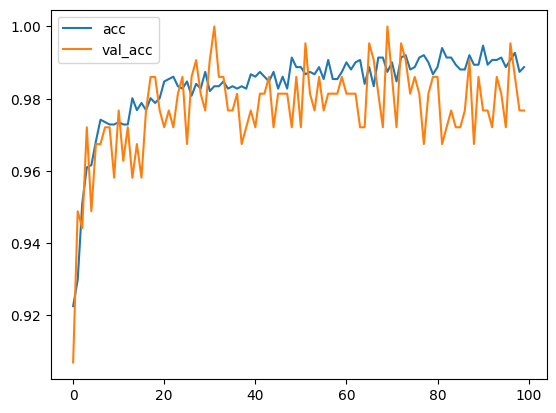

In [ ]:
dataf[['acc', 'val_acc']].plot()

<AxesSubplot: >

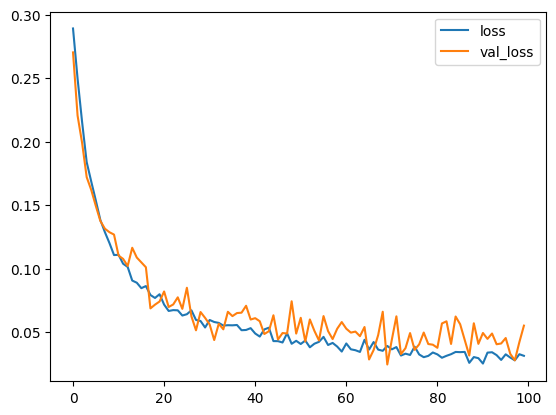

In [ ]:
dataf[['loss', 'val_loss']].plot()

In [ ]:
predictions = np.argmax(model.predict(test_image_gen), axis = -1)
predictions

14/14 [==============================] - 8s 516ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       116
           1       1.00      0.99      0.99       316

    accuracy                           0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



Confusion matrix, without normalization
[[115   1]
 [  3 313]]


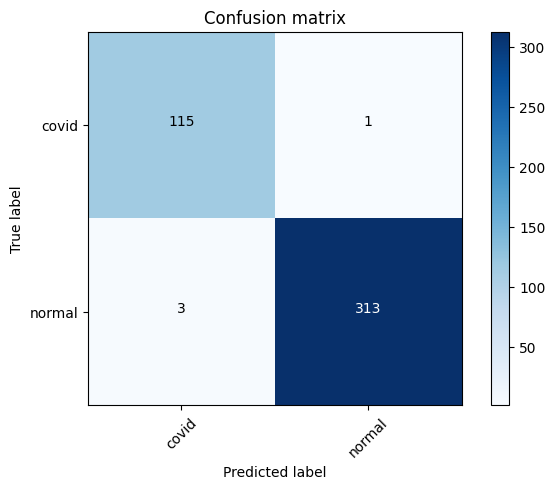

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix=confusion_matrix(test_image_gen.classes,predictions)
plot_confusion_matrix(cnf_matrix, classes=test_image_gen.class_indices)